# Movies and TV Shows on Netflix

This dataset consists of tv shows and movies available on Netflix.



Import libraries

In [114]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


#plotting colors
plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

Read data

In [115]:
nfx = pd.read_csv('../data/netflix_titles.csv')

# Exploring the data

To check this data consists of how many columns and rows

In [116]:
nfx.shape

(7787, 12)

First and last 3 rows of the data

In [117]:
nfx.head(3) # head() print the first 3 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [118]:
nfx.tail(3) # tail() print the last 3 rows 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Summary of the dataframe

In [119]:
nfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Change the index

In [120]:
print(nfx.index.name) 

None


Change the index with show_id because the show_id is the primary key. 

In [121]:
nfx.set_index('show_id', inplace=True) # this is how you change the index

In [122]:
print(nfx.index.name)  # now the index name is show_id

show_id


In [123]:
nfx.index

Index(['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10',
       ...
       's7778', 's7779', 's7780', 's7781', 's7782', 's7783', 's7784', 's7785',
       's7786', 's7787'],
      dtype='object', name='show_id', length=7787)

In [124]:
nfx.head(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


Columns header

In [125]:
nfx.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

# Data Cleansing

1. Identify the missing values

In [126]:
nfx.isnull().sum()

type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

2. Fill in the missing value

* 'director' column

In [127]:
nfx['director'] = nfx['director'].fillna(value='UnknownDirector')

In [128]:
nfx[['director']]

,director
show_id,
s1,UnknownDirector
s2,Jorge Michel Grau
s3,Gilbert Chan
s4,Shane Acker
s5,Robert Luketic
...,...
s7783,Josef Fares
s7784,Mozez Singh
s7785,UnknownDirector


* 'date_added' column

In [129]:
nfx['date_added'] = nfx['date_added'].fillna(value='date_added')

3. Drop the missing values

In [130]:
nfx = nfx.dropna(how='any', subset=['cast','country','rating'])

In [131]:
nfx.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [132]:
# before this nfx.shape = (7787, 12)
# after drop and fill
nfx.shape

(6652, 11)

4. Create a new columns

* 'genre'

In [133]:
# listed_in consists of more than one genre
# split the string thats separate with ',', make it into list and [0] stand for the first string in the list
nfx['genre'] = nfx['listed_in'].apply(lambda x : x.split(",")[0])

* 'main_country'

In [134]:
nfx['main_country'] = nfx['country'].apply(lambda x : x.split(",")[0])

In [135]:
nfx.tail(3)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,genre,main_country
show_id,,,,,,,,,,,,,
s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,Dramas,Sweden
s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Dramas,India
s7786,TV Show,Zumbo's Just Desserts,UnknownDirector,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,International TV Shows,Australia


# Data visualization

1. Number of Movies and TV Shows on Netflix

In [136]:
nfx['type'].value_counts()

Movie      4761
TV Show    1891
Name: type, dtype: int64

Text(0.5, 1.0, 'Number of Movies and TV Shows on Netflix')

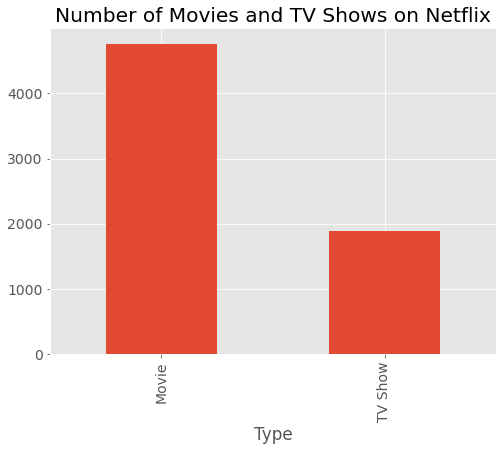

In [137]:
nfx['type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.title('Number of Movies and TV Shows on Netflix')

> * There are more movies on Netflix than TV shows.

2. Rating analysis for Movies and TV Shows

In [138]:
nfx["rating"].value_counts() # rating for both movies and tv shows

TV-MA       2452
TV-14       1639
R            655
TV-PG        629
PG-13        375
PG           238
TV-Y7        209
TV-Y         192
TV-G         146
NR            67
G             38
UR             5
TV-Y7-FV       4
NC-17          3
Name: rating, dtype: int64

* Rating analysis for Movies

In [139]:
nfx[nfx['type'] == "Movie"]["rating"].value_counts()

TV-MA       1628
TV-14       1110
R            654
TV-PG        412
PG-13        375
PG           238
TV-G          85
TV-Y          75
TV-Y7         73
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          3
Name: rating, dtype: int64

Text(0.5, 1.0, 'Movies Rating')

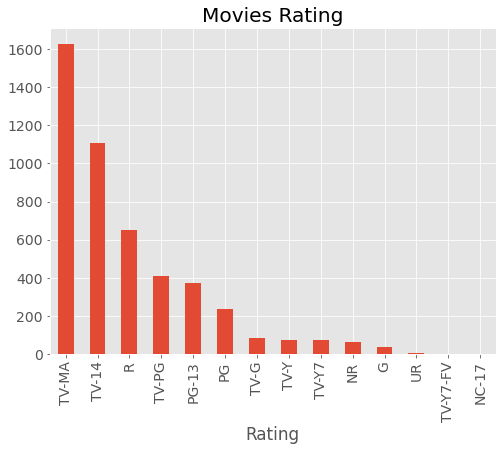

In [140]:
nfx[nfx['type'] == "Movie"]['rating'].value_counts().plot(kind='bar')
plt.xlabel("Rating")
plt.title("Movies Rating")

> * Movies with rating 'TV-MA' has the highest count on Netflix. 'TV-MA' rating stands for the program is intended to be viewed by mature, adult audiences and may be unsuitable for children under 17.

> * Second highest count is movies with rating 'TV-14'. 'TV-14' rating stands for the program may be unsuitable for children under 14 years of age.

> * Movie with rating 'R' has the third highest count on Netflix. 'R' rating stands for restricted, children under 17 require accompanying parent or adult guardian. 

* Rating analysis for TV shows

In [141]:
nfx[nfx['type'] == "TV Show"]["rating"].value_counts()

TV-MA       824
TV-14       529
TV-PG       217
TV-Y7       136
TV-Y        117
TV-G         61
NR            5
TV-Y7-FV      1
R             1
Name: rating, dtype: int64

Text(0.5, 1.0, 'TV Shows Rating')

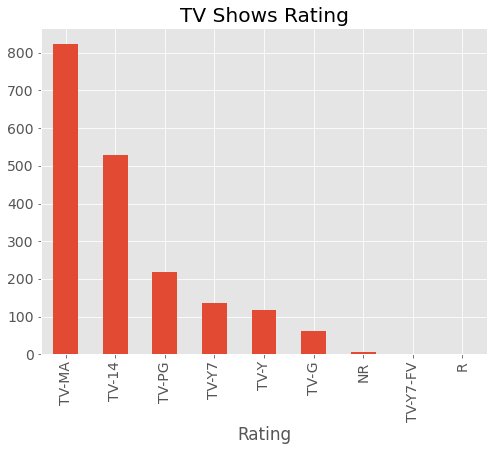

In [142]:
nfx[nfx['type'] == "TV Show"]["rating"].value_counts().plot(kind='bar')
plt.xlabel("Rating")
plt.title("TV Shows Rating")

> * TV shows with rating 'TV-MA' has the highest count on Netflix, while the second highest count is 'TV-14' and the third highest count is 'TV-PG'. 'TV-PG' stands for program contains material that parents may find unsuitable for younger children. Parental guidance is recommended.

3. Analysis for Movie duration and TV Show their seasons

* Make a new dataframe for movie and tv show

In [143]:
nfx_movie = nfx[nfx['type'] == 'Movie']
nfx_tvshow = nfx[nfx['type'] == 'TV Show']

* Create a function to get the number in 'duration' and change it into integer

In [144]:
def change_to_integer(duration):    
        try:
            return int(duration.split(' ')[0]) # split the string and [0] contain the number 
        except:
            return 'NaN'
        

In [145]:
change_to_integer('100 seasons')

100

* Apply the function for 'duration' in the new dataframe (nfx_movie & nfx_tvshow) created above and make two new columns

In [146]:
nfx_movie['duration'] = nfx_movie['duration'].apply(lambda x : change_to_integer(x))
nfx_movie['duration']

show_id
s2        93
s3        78
s4        80
s5       123
s7        95
        ... 
s7779     88
s7781     94
s7782     88
s7783     99
s7784    111
Name: duration, Length: 4761, dtype: int64

In [147]:
nfx_tvshow['duration'] = nfx_tvshow['duration'].apply(lambda x : change_to_integer(x))
nfx_tvshow['duration']

show_id
s1       4
s6       1
s12      1
s25      2
s30      1
        ..
s7760    3
s7768    1
s7776    1
s7780    1
s7786    1
Name: duration, Length: 1891, dtype: int64

* Analysis for movies duration

Text(0.5, 0, 'Duration of the movie')

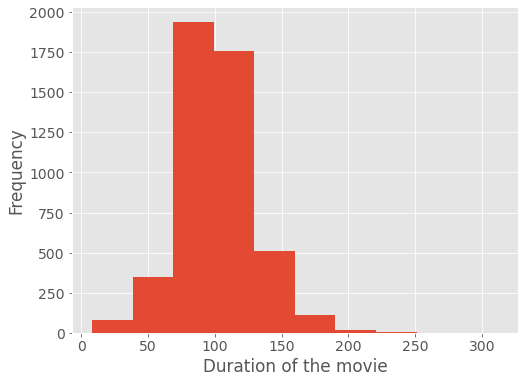

In [148]:
nfx_movie['duration'].plot(kind='hist')
plt.xlabel('Duration of the movie')

> * Most of the movies on Netflix have duration between 70 - 130 mins

* Analysis for TV Show and their season/s

In [149]:
season = ['title','duration']
nfx_tvshow_season = nfx_tvshow[season].sort_values(by='duration',ascending=False).head(20)

   * TV Shows with the highest number of seasons (Top 20)

In [150]:
nfx_tvshow_season

,title,duration
show_id,,
s2539,Grey's Anatomy,16
s4439,NCIS,15
s5913,Supernatural,15
s1472,COMEDIANS of the world,13
s5138,Red vs. Blue,13
s1538,Criminal Minds,12
s7170,Trailer Park Boys,12
s2679,Heartland,11
s2264,Frasier,11


Text(0.5, 0, 'Title')

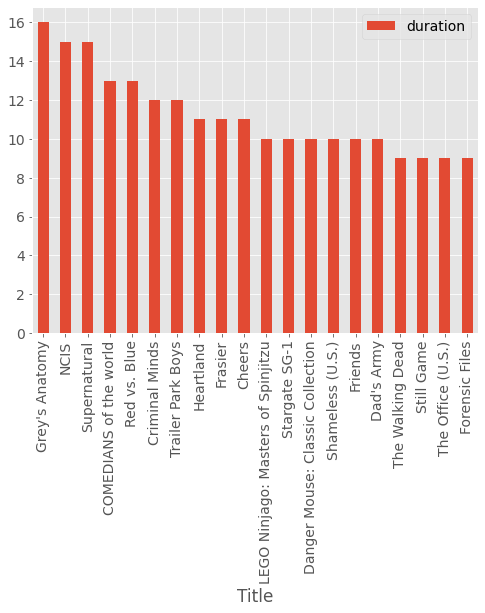

In [151]:
nfx_tvshow_season.plot(kind='bar', x='title')
plt.xlabel('Title')

> * TV show that has the highest number of season is Grey's Anatomy
> * The second highest are NCIS and Supernatural

4. Most Popular Genre on Netflix (Top 20)

In [152]:
nfx['genre'].value_counts().sort_values(ascending=True).tail(20)

TV Action & Adventure         36
Thrillers                     49
TV Dramas                     62
Reality TV                    64
Classic Movies                69
Docuseries                    84
International Movies         104
TV Comedies                  110
Anime Series                 135
British TV Shows             185
Horror Movies                240
Kids' TV                     273
Crime TV Shows               291
Stand-Up Comedy              292
Documentaries                367
Children & Family Movies     437
International TV Shows       559
Action & Adventure           700
Comedies                    1043
Dramas                      1348
Name: genre, dtype: int64

Text(0.5, 0, 'Genre')

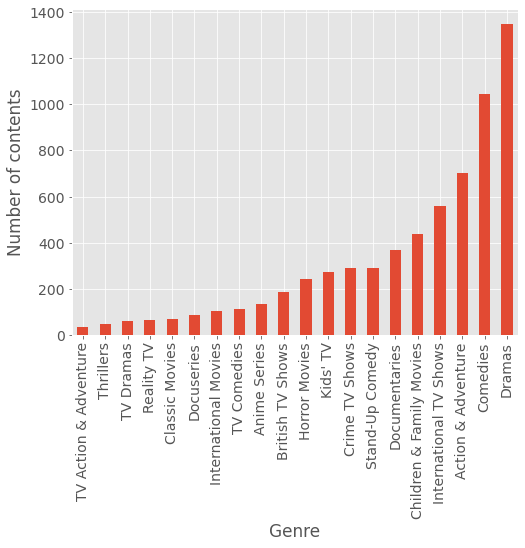

In [153]:
nfx['genre'].value_counts().sort_values(ascending=True).tail(20).plot(kind='bar')
plt.ylabel('Number of contents')
plt.xlabel('Genre')

> * Most of the genre for contents on Netflix is Dramas.